<a href="https://colab.research.google.com/github/kjm12misa/Google_drive/blob/main/Python/Chapter_5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 데이터 불러오기(pandas)
- 도수, 당도, 산도, 종류(화이트, 레드)

In [ ]:
import pandas as pd
wine = pd.read_csv("https://bit.ly/wine_csv_data")
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


info()
- 결측치 확인/변수 타입

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
# 열에 대한 간단한 통계 : 최소, 최대, 평균값, Q1~Q4 값 등,,
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


표쥰화 작업

In [ ]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

훈련데이터와 테스트 데이터로 분리
-[NEW!] : test_size = 0.2
  + 


In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size = 0.2, random_state = 42
)

print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

모델 만들기
- 로지스틱회귀
 - 수식 : 의사결정트리의 기본 알고리즘을 활용해서, MS, 구글 등 이런회사들이 신규 알고리즘을 만듬
 - xGBoost, LightGBM, CatBosst
 - 캐글 정형 데이터
 - LightGBM(현재 실무에서 많이 쓰임) : 의사결정 트리와 경사하강이 섞여있음.
 - 4월 말까지는 코드에 집중 대회 나감
 - PPT(알고리즘 소개)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
print(lr.coef_, lr.intercept_)

0.7808350971714451
0.7776923076923077
[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


+ 결정트리 : 질문을 하나씩 던져서 정답을 맞춰가는 것.(스무고개와 비슷)
  + 훈련 세트-> 정확도 평가(테스트 세트) 순으로 앞 코딩과 똑같이 진행.
  + 성능이 좋은게 항상 좋은게 아니라 정확도가 좋아야 한다. --> 그러므로 훈련 데이터의 점수를 낮추는게 좀 더 조정하기 쉽다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target)) # 훈련 세트
print(dt.score(test_scaled, test_target)) # 테스트 세트

0.996921300750433
0.8592307692307692


시각화 하기

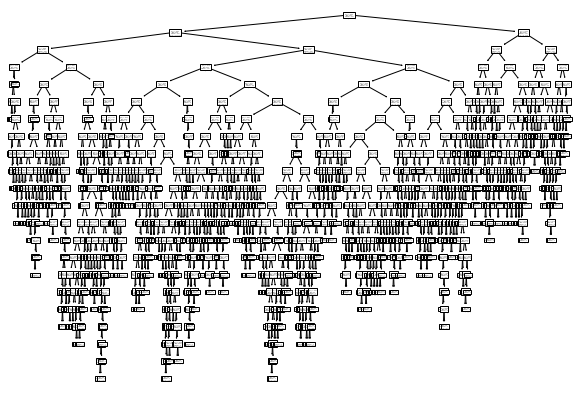

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize = (10, 7))
plot_tree(dt)
plt.show()

- max_depth() : 트리의 최대 깊이 값을 설정
  - eg. 1이면 0 라인[시작] ~ 1 라인[끝]까지 출력, 2면 0 라인[시작], 1 라인[중간], 2라인[끝] 까지의 트리를 출력.
  - 출처 : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
- gini : 불순도(O, X 게임 같이 X인 불순물은 제거가 되고 끝까지 살아 남는 O(데이터)를 거르는 것.) 
  + gini의 숫자가 낮으면 불순물이 많이 사라지고 나중에 분류가 쉬워진다.
  + gini가 O이 되었을 때 분류가 되었다라고 볼 수 있다.
- figsize = (가로길이, 세로길이)
  + 출처 : https://pyvisuall.tistory.com/71

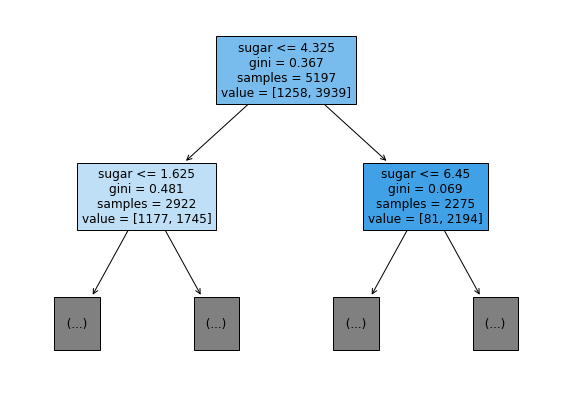

In [ ]:
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1, filled =True, feature_names =['alcohol', 'sugar', 'pH'])
plt.show()

- 훈련 데이터와 테스트 데이터 값이 유사하게 나와야지 좋다.

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


filled = True 로 지정한 이유.
- value = (271, 456) 의 경우 비등하기 때문에 애매한게 많고 분류가 잘 되지 않았다
- value = (39, 161) 의 경우 차이가 얼마 안나고, gini의 수도 적기 때문에 분류가 잘 되었다고 볼 수 있다.

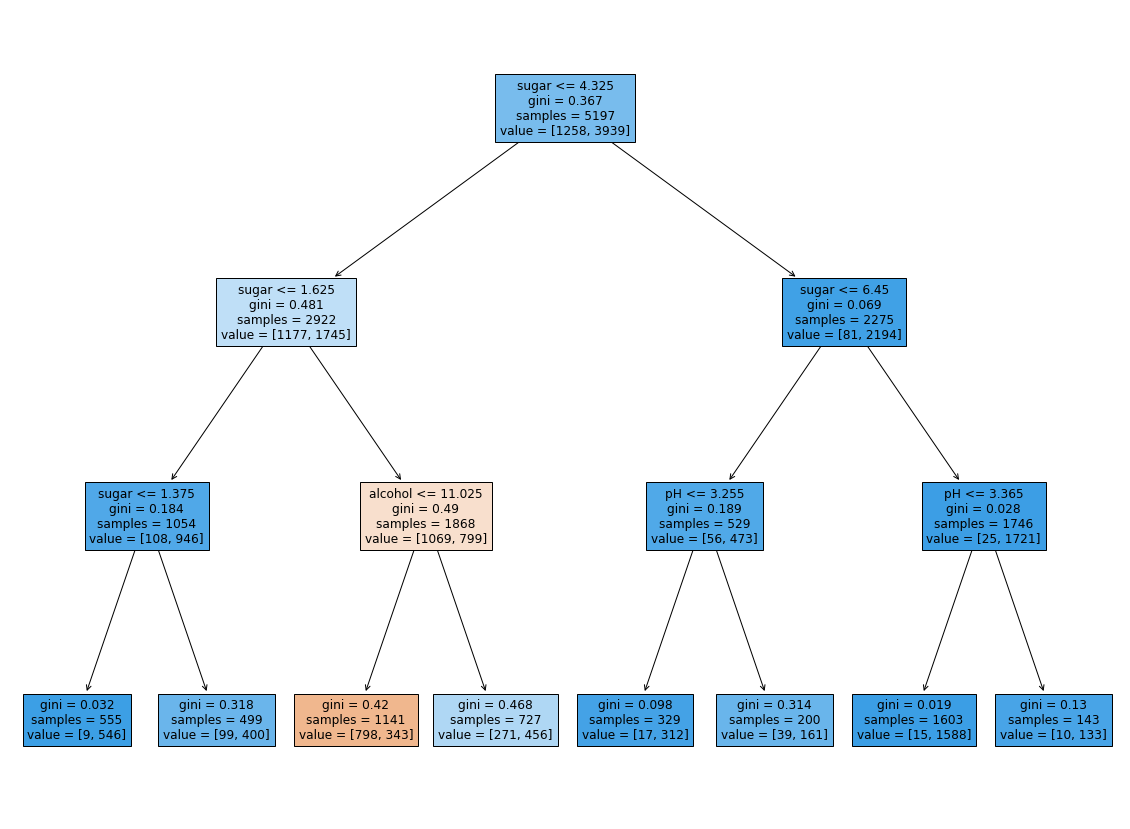

In [54]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled =True, feature_names =['alcohol', 'sugar', 'pH'])
plt.show()

#### 색상 변경을 원한다면 쓸 수 있는 식

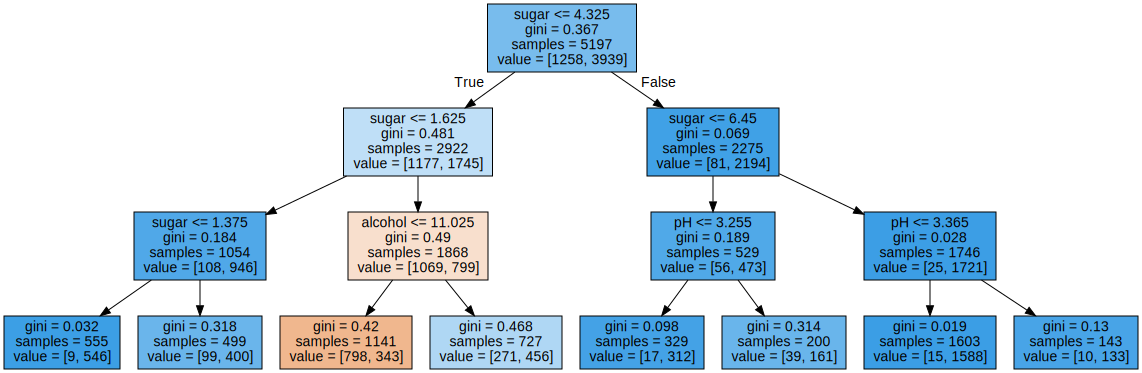

In [55]:
import graphviz
from sklearn import tree

# DOT data
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names = ['alcohol', 'sugar', 'pH'],  
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [56]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

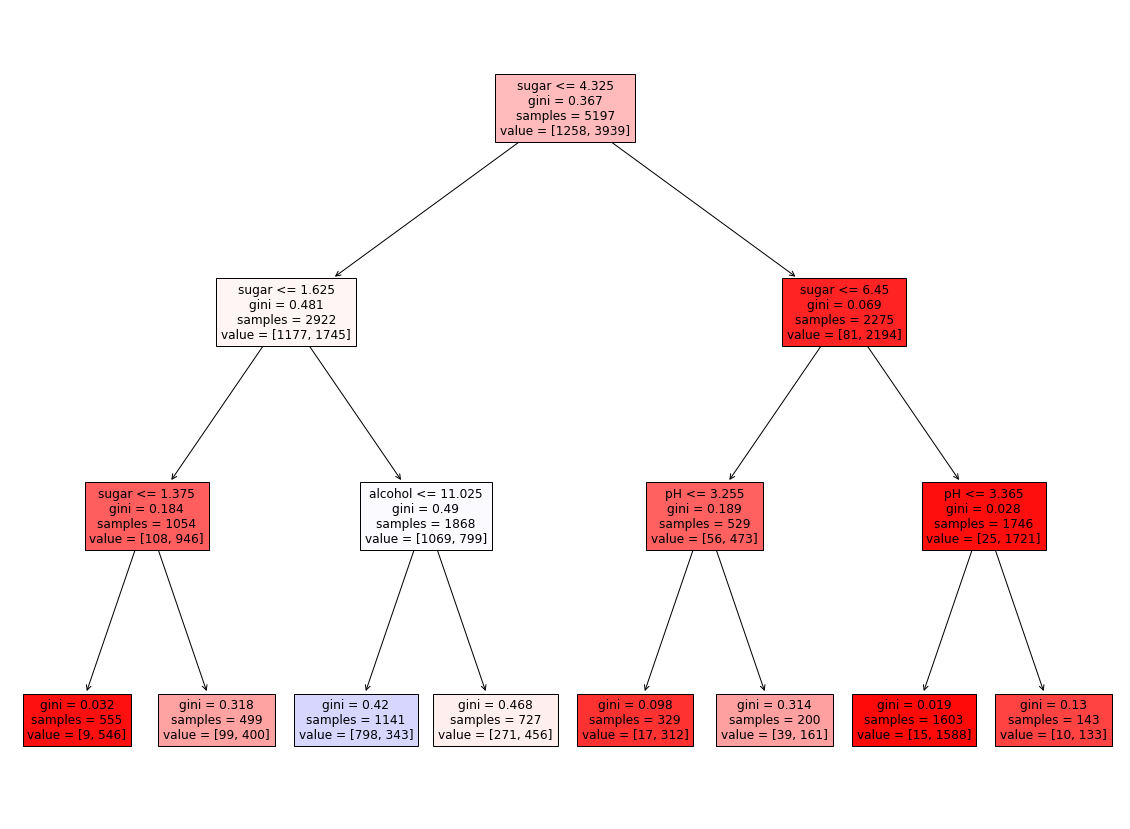

In [57]:
from matplotlib.colors import ListedColormap, to_rgb
import numpy as np

plt.figure(figsize=(20, 15))
artists = plot_tree(dt, filled = True, 
          feature_names = ['alcohol', 'sugar', 'pH'])

colors = ['blue', 'red']
for artist, impurity, value in zip(artists, dt.tree_.impurity, dt.tree_.value):
    r, g, b = to_rgb(colors[np.argmax(value)])
    f = impurity * 2
    artist.get_bbox_patch().set_facecolor((f + (1-f)*r, f + (1-f)*g, f + (1-f)*b))
    artist.get_bbox_patch().set_edgecolor('black')

plt.show()